<a href="https://colab.research.google.com/github/kotech1/computervision/blob/master/05_cnnbasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#크로스 엔트로피#

동전을 100번 던져서 51번이 앞면, 49번이 뒷면이 나왔다고 가정합니다.  
앞면과 뒷면이 나올 확률을 각각 (0.5, 0.5)라고 가정했을 때 Likelyhood는 얼마인가요?  

$
\text{Likelyhood} =
\prod q_i^{N_i} 
= q_1^{51}q_2^{49}=0.5^{51}\cdot0.5^{49}
$


In [93]:
print(0.5**51*0.5**49)

7.888609052210118e-31


이 경우 실제 확률 $p_1=51/100, p_2=49/100$ 이라고 하면,  
교차 엔트로피(Cross Entropy)는 얼마입니까?  

$
H = -\sum p_i\log q_i = -0.51\log0.5-0.49\log0.5
$

In [95]:
print(-0.51*np.log(0.5)-0.49*np.log(0.5))

0.6931471805599453


앞면과 뒷면이 나올 확률을 $q_1 = 0.51, q_2 = 0.49$ 로 가정했을 때 Likelyhood는 얼마인가요?   
  
$
q_1^{51}q_2^{49}=0.51^{51}\cdot0.49^{49}
$ 

In [96]:
print(0.51**51*0.49**49)

8.047980258362417e-31


이 경우 교차 엔트로피는 얼마입니까?  

$
H = -\sum p_i\log q_i = -0.51\log0.51-0.49\log0.49
$

In [97]:
print(-0.51*np.log(0.51)-0.49*np.log(0.49))

0.6929471672244782


두 경우에 대해 mse (평균 제곱오차)를 계산해 봅시다.  

$
\text{mse} = {1\over N}\sum\left(\hat{y}-y\right)^2
= {1\over 2} \sum\left(q_i-p_i\right)^2
$

In [105]:
print(((0.5-0.51)**2+(0.5-0.49)**2)/2)
print(((0.51-0.51)**2+(0.49-0.49)**2)/2)

0.00010000000000000018
0.0


cross entropy와 mse의 차이를 비교해봅시다.  


In [104]:
print('cross entropy difference = ',
      -0.51*np.log(0.5)-0.49*np.log(0.5)-(-0.51*np.log(0.51)-0.49*np.log(0.49)))
print('mse difference = ', 
      ((0.51-0.5)**2+(0.49-0.5)**2)/2 - ((0.51-0.51)**2+(0.49-0.49)**2)/2)

cross entropy difference =  0.00020001333546704192
mse difference =  0.00010000000000000018


참 값이 $p_1 = 1, p_2 = 0$ 입니다.  
예측값이 $q_1 = 0.9, q_2 = 0.1$ 인 경우와, $q_1 = 1, q_2=0$ 인 경우의 각각에 대해  
cross entropy의 차이와 mse의 차이를 비교해봅시다.

In [115]:
def cross_entropy(p, q):
  p2 = p[p!=0] # p_i가 0일 경우에는 log(0)계산을 피하기 위해 제거하고 계산함.
  q2 = q[p!=0]
  return (-p2*np.log(q2)).sum()

def mse(p, q):
  return ((p-q)**2).sum()/len(p)

p = np.array([1., 0.])
q_a = np.array([0.9, 0.1])
q_b = np.array([1., 0.])
h_a = cross_entropy(p, q_a)
h_b = cross_entropy(p, q_b)
print('cross entropy difference = ', h_a-h_b)
l_a = mse(p, q_a)
l_b = mse(p, q_b)
print('mse difference = ', l_a-l_b)

cross entropy difference =  0.10536051565782628
mse difference =  0.009999999999999998


# CNN을 이용한 MNIST 인식

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
NUM_CLASSES = 10

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = x_train/255.
x_test = x_test/255.

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print("converted x.shape = ", x_train.shape)

converted x.shape =  (60000, 28, 28, 1)


In [78]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [85]:
conv2d_1 = model.layers[0]
weights = conv2d_1.get_weights()
w = weights[0]
b = weights[1]
print(w.shape, b.shape)
filter_id = 0
kernel = w[:,:,:,filter_id:filter_id+1]
kernel = kernel.reshape(3,3)
print(kernel)

(3, 3, 1, 32) (32,)
[[-0.08932558  0.12311997  0.04997042]
 [ 0.12559615  0.04483671 -0.09872664]
 [ 0.09862268 -0.06744859 -0.0646313 ]]


In [86]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5688 - accuracy: 0.8280
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1338 - accuracy: 0.9590
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0919 - accuracy: 0.9716
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0719 - accuracy: 0.9773
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0607 - accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0537 - accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0482 - accuracy: 0.9850
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0427 - accuracy: 0.9868
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0395 - accuracy: 0.9880
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [87]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0390 - accuracy: 0.9880


{'loss': [0.5687820315361023, 0.1337660700082779, 0.09190244227647781, 0.07186490297317505, 0.0607285238802433, 0.05370797961950302, 0.04817459359765053, 0.042663414031267166, 0.039454586803913116, 0.03574656695127487], 'accuracy': [0.8279833197593689, 0.9589666724205017, 0.9716333150863647, 0.9773333072662354, 0.98089998960495, 0.9832166433334351, 0.9849666953086853, 0.9867666959762573, 0.9880333542823792, 0.9891499876976013]}


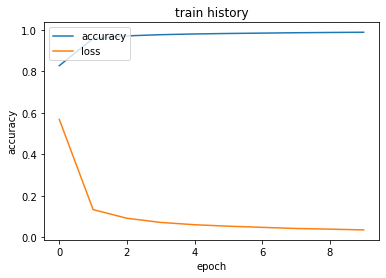

In [88]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('train history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

**Fully Connected Network과의 비교**

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6512 - accuracy: 0.8337
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3355 - accuracy: 0.9066
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2875 - accuracy: 0.9188
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - lo

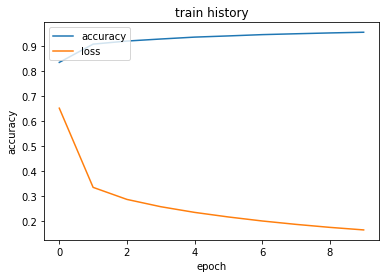

313/313 [==============================] - 1s 3ms/step - loss: 0.1656 - accuracy: 0.9521


In [92]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('train history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test)

In [39]:
import matplotlib.pyplot as plt
from keras import backend as K

def get_layer_outputs():
    print(model.summary())
    test_image = x_train[0:1]
    outputs    = [layer.output for layer in model.layers]          # all layer outputs
    #comp_graph = [K.function([model.input]+ [K.learning_phase()], [output]) for output in outputs]  # evaluation functions
    comp_graph = [K.function([model.input]+ [keras.Input(shape=())], [output]) for output in outputs]  # evaluation functions

    # Testing
    layer_outputs_list = [op([test_image, 1.]) for op in comp_graph]
    layer_outputs = []

    for layer_output in layer_outputs_list:
        print(layer_output[0][0].shape, end='\n-------------------\n')
        layer_outputs.append(layer_output[0][0])

    return layer_outputs

def plot_layer_outputs(layer_number):    
    layer_outputs = get_layer_outputs()

    x_max = layer_outputs[layer_number].shape[0]
    y_max = layer_outputs[layer_number].shape[1]
    n     = layer_outputs[layer_number].shape[2]

    L = []
    for i in range(n):
        L.append(np.zeros((x_max, y_max)))

    for i in range(n):
        for x in range(x_max):
            for y in range(y_max):
                L[i][x][y] = layer_outputs[layer_number][x][y][i]


    for img in L:
        plt.figure()
        plt.imshow(img, interpolation='nearest')

In [ ]:
#plot_layer_outputs(2)
print(x_train[0].shape)

In [41]:
test_image = x_train[0:1]
outputs    = [layer.output for layer in model.layers]          # all layer outputs
#comp_graph = [K.function([model.input]+ [K.learning_phase()], [output]) for output in outputs]  # evaluation functions
comp_graph = [K.function([model.input]+ [keras.Input(shape=())], [output]) for output in outputs]  # evaluation functions

# Testing
layer_outputs_list = [op([test_image, 1.]) for op in comp_graph]
layer_outputs = []

for layer_output in layer_outputs_list:
    print(layer_output[0][0].shape, end='\n-------------------\n')
    layer_outputs.append(layer_output[0][0])

(26, 26, 32)
-------------------
(13, 13, 32)
-------------------
(11, 11, 64)
-------------------
(5, 5, 64)
-------------------
(3, 3, 64)
-------------------
(576,)
-------------------
(64,)
-------------------
(10,)
-------------------


TypeError: ignored

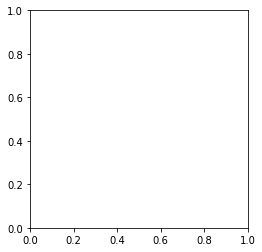

In [53]:
len(layer_outputs)
layer_outputs[1].shape
plt.imshow(layer_outputs[0][:,:,0:1])
plt.show()

In [4]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.33, epochs=5)

Epoch 1/5


KeyboardInterrupt: ignored

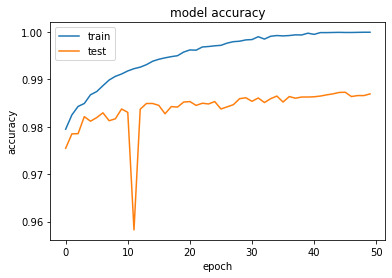

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()